# Loading Data

In [1]:
import pandas as pd  # type: ignore

df = pd.read_csv('D:\Project\ML final project\salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Data Scientist,120000,USD,120000,AU,0,AU,S
1,2024,MI,FT,Data Scientist,70000,USD,70000,AU,0,AU,S
2,2024,MI,CT,Data Scientist,130000,USD,130000,US,0,US,M
3,2024,MI,CT,Data Scientist,110000,USD,110000,US,0,US,M
4,2024,MI,FT,Data Science Manager,240000,USD,240000,US,0,US,M


# Preprocessing Data

## Data infomation

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16494 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16494 non-null  int64 
 1   experience_level    16494 non-null  object
 2   employment_type     16494 non-null  object
 3   job_title           16494 non-null  object
 4   salary              16494 non-null  int64 
 5   salary_currency     16494 non-null  object
 6   salary_in_usd       16494 non-null  int64 
 7   employee_residence  16494 non-null  object
 8   remote_ratio        16494 non-null  int64 
 9   company_location    16494 non-null  object
 10  company_size        16494 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


In [3]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16494.000000,1.649400e+04,16494.000000,16494.000000
mean,2023.224991,1.637878e+05,149713.575725,32.044986
std,0.713405,3.406017e+05,68516.136918,46.260201
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.020000e+05,101517.500000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.873422e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [4]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Data preprocessing 

In [5]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10093 entries, 0 to 16493
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           10093 non-null  int64 
 1   experience_level    10093 non-null  object
 2   employment_type     10093 non-null  object
 3   job_title           10093 non-null  object
 4   salary              10093 non-null  int64 
 5   salary_currency     10093 non-null  object
 6   salary_in_usd       10093 non-null  int64 
 7   employee_residence  10093 non-null  object
 8   remote_ratio        10093 non-null  int64 
 9   company_location    10093 non-null  object
 10  company_size        10093 non-null  object
dtypes: int64(4), object(7)
memory usage: 946.2+ KB


<Axes: >

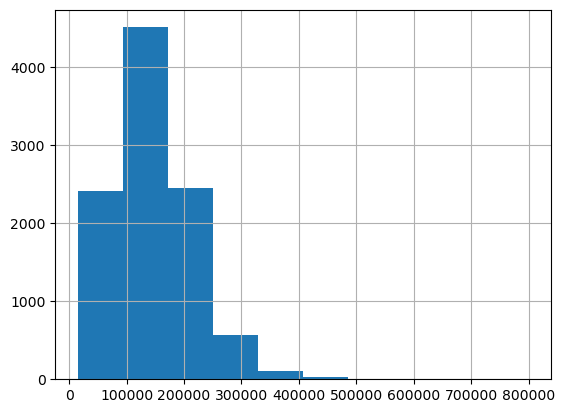

In [6]:
#Visualization of salary
df['salary_in_usd'].hist()

# Prepare for Linear Regression


## Label Encoding 
Chuẩn hóa các biến categorical có thứ tự 

In [7]:
experience = {'EN' : 1,'MI' : 2, 'SE' : 3, 'EX' : 4}
df['experience_level_LE'] = df['experience_level'].map(experience)
company_size = {'S' : 1, 'M' : 2, 'L' : 3}
df['company_size_LE'] = df['company_size'].map(company_size)
df['company_size_LE'] = df['company_size_LE'].astype(int)
df = df.drop(columns= ['experience_level', 'company_size'])

In [8]:
df

,work_year,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_LE,company_size_LE
0,2024,FT,Data Scientist,120000,USD,120000,AU,0,AU,2,1
1,2024,FT,Data Scientist,70000,USD,70000,AU,0,AU,2,1
2,2024,CT,Data Scientist,130000,USD,130000,US,0,US,2,2
3,2024,CT,Data Scientist,110000,USD,110000,US,0,US,2,2
4,2024,FT,Data Science Manager,240000,USD,240000,US,0,US,2,2
...,...,...,...,...,...,...,...,...,...,...,...
16489,2020,FT,Data Scientist,412000,USD,412000,US,100,US,3,3
16490,2021,FT,Principal Data Scientist,151000,USD,151000,US,100,US,2,3
16491,2020,FT,Data Scientist,105000,USD,105000,US,100,US,1,1
16492,2020,CT,Business Data Analyst,100000,USD,100000,US,100,US,1,3


## Seperating Data into X and y 

In [9]:
# Lấy đơn vị của salary in usd là nghìn đô thay vì đô
df['salary_in_usd'] = df['salary_in_usd']/1000
y = df['salary_in_usd']
X = df.drop(['salary', 'salary_currency', 'salary_in_usd'], axis = 1)

In [10]:
X.head()

,work_year,employment_type,job_title,employee_residence,remote_ratio,company_location,experience_level_LE,company_size_LE
0,2024,FT,Data Scientist,AU,0,AU,2,1
1,2024,FT,Data Scientist,AU,0,AU,2,1
2,2024,CT,Data Scientist,US,0,US,2,2
3,2024,CT,Data Scientist,US,0,US,2,2
4,2024,FT,Data Science Manager,US,0,US,2,2


In [11]:
y.head()

0    120.0
1     70.0
2    130.0
3    110.0
4    240.0
Name: salary_in_usd, dtype: float64

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10093 entries, 0 to 16493
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            10093 non-null  int64 
 1   employment_type      10093 non-null  object
 2   job_title            10093 non-null  object
 3   employee_residence   10093 non-null  object
 4   remote_ratio         10093 non-null  int64 
 5   company_location     10093 non-null  object
 6   experience_level_LE  10093 non-null  int64 
 7   company_size_LE      10093 non-null  int32 
dtypes: int32(1), int64(3), object(4)
memory usage: 670.2+ KB


## One Hot Encoding 
Chuẩn hóa các biến kiểu categorical không có thứ tự 

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
categorical_features = ['employment_type',
                        'job_title',
                        'employee_residence',
                        'company_location',]
one_hot = OneHotEncoder(handle_unknown= 'ignore', sparse_output= False).set_output(transform= 'pandas')
transformer = ColumnTransformer([('one_hot',one_hot, categorical_features)], remainder= 'passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[  0.,   0.,   1., ...,   0.,   2.,   1.],
       [  0.,   0.,   1., ...,   0.,   2.,   1.],
       [  1.,   0.,   0., ...,   0.,   2.,   2.],
       ...,
       [  0.,   0.,   1., ..., 100.,   1.,   1.],
       [  1.,   0.,   0., ..., 100.,   1.,   3.],
       [  0.,   0.,   1., ...,  50.,   3.,   3.]])

## Splitting Data

In [15]:
from sklearn.model_selection import train_test_split # type: ignore

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size= 0.2)

# Model Linear Regression 

## Training Model 

In [16]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [17]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

## Evaluate Model 

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

lr_train_mse = mean_squared_error(y_train, y_train_pred)
lr_test_mse = mean_squared_error(y_test, y_test_pred)
lr_train_r2 = r2_score(y_train, y_train_pred)
lr_test_r2 = r2_score(y_test, y_test_pred)

In [19]:
print('model coefficients: ', lr.coef_)
print('model intercept: ', lr.intercept_)
print('lr train mean square error: ', lr_train_mse)
print('lr test mean square error: ', lr_test_mse)
print('lr train r2 score: ', lr_train_r2)
print('lr test r2 score: ', lr_test_r2)

model coefficients:  [-1.47631385e+05 -1.47640071e+05 -1.47621380e+05 -1.47646288e+05
 -9.24124280e+09 -9.24124288e+09 -9.24124289e+09 -9.24124290e+09
 -9.24124295e+09 -9.24124289e+09 -9.24124295e+09 -9.24124290e+09
 -9.24124291e+09 -9.24124279e+09 -9.24124293e+09 -9.24124290e+09
 -9.24124262e+09 -9.24124288e+09 -9.24124290e+09 -9.24124289e+09
 -9.24124297e+09 -9.24124287e+09 -9.24124288e+09 -9.24124291e+09
 -9.24124293e+09 -9.24124294e+09 -9.24124296e+09 -9.24124294e+09
 -9.24124289e+09 -9.24124291e+09 -9.24124294e+09 -9.24124291e+09
 -9.24124293e+09 -9.24124292e+09 -9.24124294e+09 -9.24124297e+09
 -9.24124296e+09 -9.24124293e+09 -9.24124292e+09 -9.24124291e+09
 -9.24124293e+09 -9.24124293e+09 -9.24124281e+09 -9.24124286e+09
 -9.24124292e+09 -9.24124294e+09 -9.24124288e+09 -9.24124286e+09
 -9.24124291e+09 -9.24124293e+09 -9.24124294e+09 -9.24124292e+09
 -9.24124298e+09 -9.24124295e+09 -9.24124291e+09 -9.24124287e+09
 -9.24124292e+09 -9.24124295e+09 -9.24124291e+09 -9.24124291e+09
 -9.

In [20]:
lr.score(X_train, y_train)

0.35399509035334364

In [21]:
lr.predict(X_test[:5])

array([120.38818359, 149.11920166,  80.56793213, 198.77227783,
       126.37258911])

In [22]:
y_test[:5]

9315     168.0
65       131.0
12002    140.0
1054     208.5
14192    112.0
Name: salary_in_usd, dtype: float64